Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.getcwd()
os.chdir("F:\Rakesh\PGP-BABI\Python Programming")
os.getcwd()

In [31]:
import warnings
warnings.filterwarnings('ignore')

df_price = pd.read_csv("houseprice.csv")
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


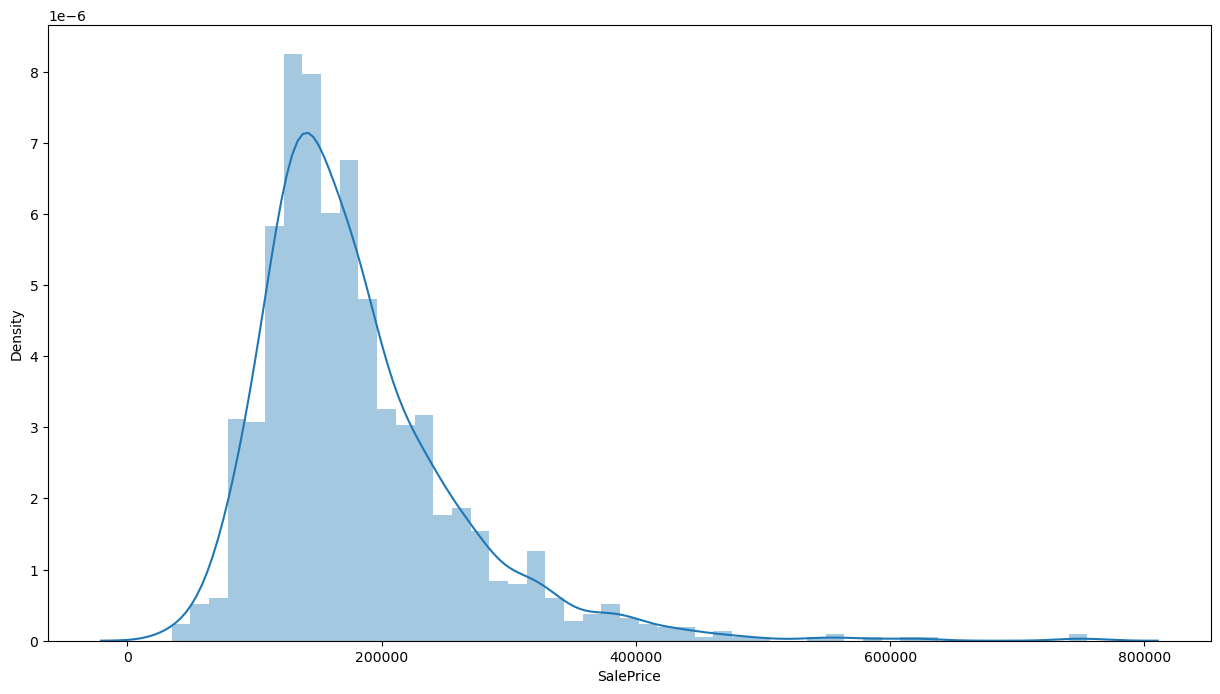

In [32]:
plt.figure(figsize=(15,8))
sns.distplot(df_price['SalePrice'])
plt.show()

In [33]:
df_price.drop('Id',axis=1,inplace=True)
df_price.shape

(1460, 80)

Change the DataType

In [34]:
cols =['MSSubClass','OverallQual','OverallCond']

In [35]:
for i in cols:
  df_price[cols]=df_price[cols].astype('object')

### Check if there are any missing values

In [36]:
(df_price.isnull().sum()/df_price.index.size)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [37]:
(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### Missing Values
1. PoolQC, MiscFeature,Alley and Fence have high values of null.
2. Option is to drop these variables.
3. Instead of dropping, let us do some feature engineering

In [38]:
df_num=df_price.select_dtypes(include=np.number)
df_num= df_num.drop('SalePrice',axis=1)


df_cat =df_price.select_dtypes(exclude=np.number)

### Univariate Analysis

In [39]:
cols=list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

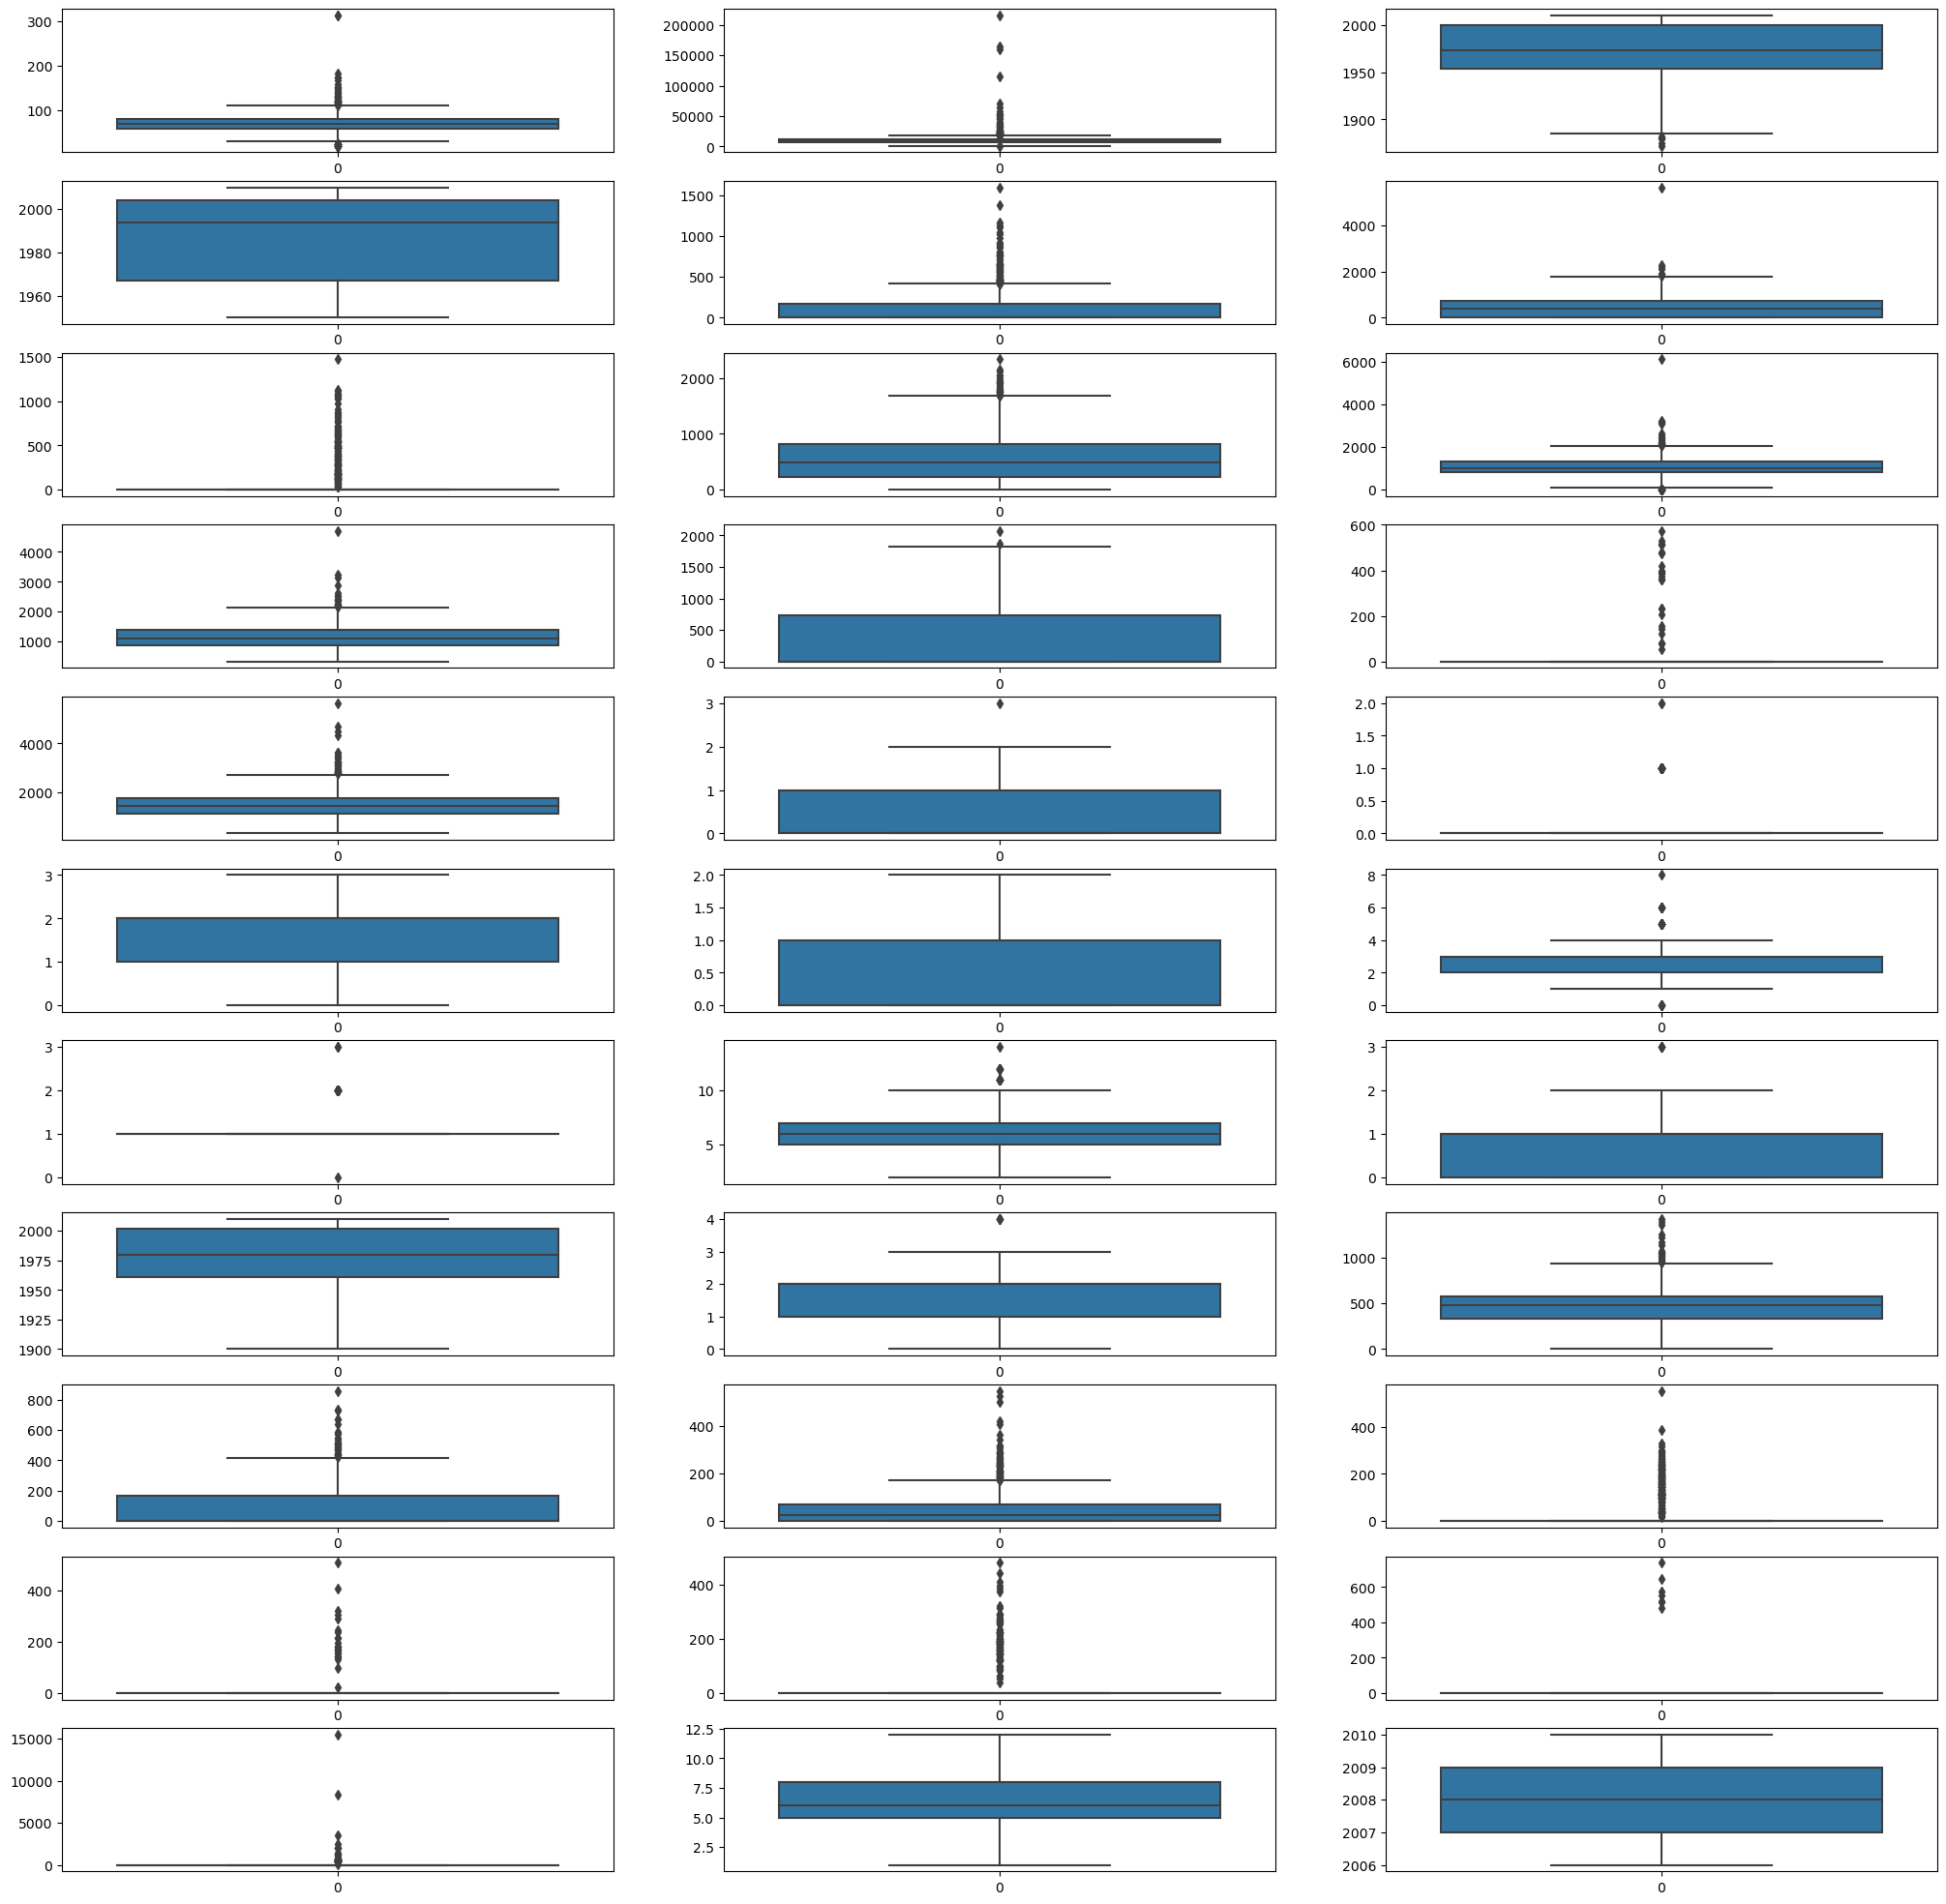

In [40]:
fig, ax=plt.subplots(11,3,figsize=(25,25))
for var, subplot in zip(df_num.columns,ax.flatten()):
  sns.boxplot(df_num[var],ax=subplot)

plt.show()

### Use KNN IMputer for imputing missing numerical values

In [41]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num_sc= pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [42]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

All Numeric Numbers are imputed

### Impute Categorical Variables

In [43]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

First 4 variables have to be dealt with differently

1. Where ever the data is available mark it as 1. Where ever, data is not available mark it as 0.

In [44]:
df_cat['PoolQC_ava']=df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [45]:
df_cat['PoolQC_ava'].value_counts()

PoolQC_ava
0    1453
1       7
Name: count, dtype: int64

In [46]:
df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0)

In [47]:
df_cat['MiscFeature_ava'].value_counts()

MiscFeature_ava
0       1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [48]:
df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [49]:
df_cat['MiscFeature_ava'].value_counts()

MiscFeature_ava
0    1406
1      54
Name: count, dtype: int64

In [50]:
df_cat['Alley_ava']=df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [51]:
df_cat['Fence_ava']=df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [52]:
df_cat['FireplaceQu_ava']=df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

All the highly missing values in the columns have been Feature Engineered

1. Drop the Columns which have Feature Engineered.
2. Drop the old columns and retain the new columns which have Feature Engineering

In [53]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature'],axis=1,inplace=True)

In [54]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [55]:
df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava']] = df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava']].astype(object)

In [57]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

MasVnrType      59.726027
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# fit it on all non object

imputer= imputer.fit(df_cat.iloc[:,:])

In [59]:
df_cat_trans=imputer.transform(df_cat)

In [60]:
df_cat =pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [61]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

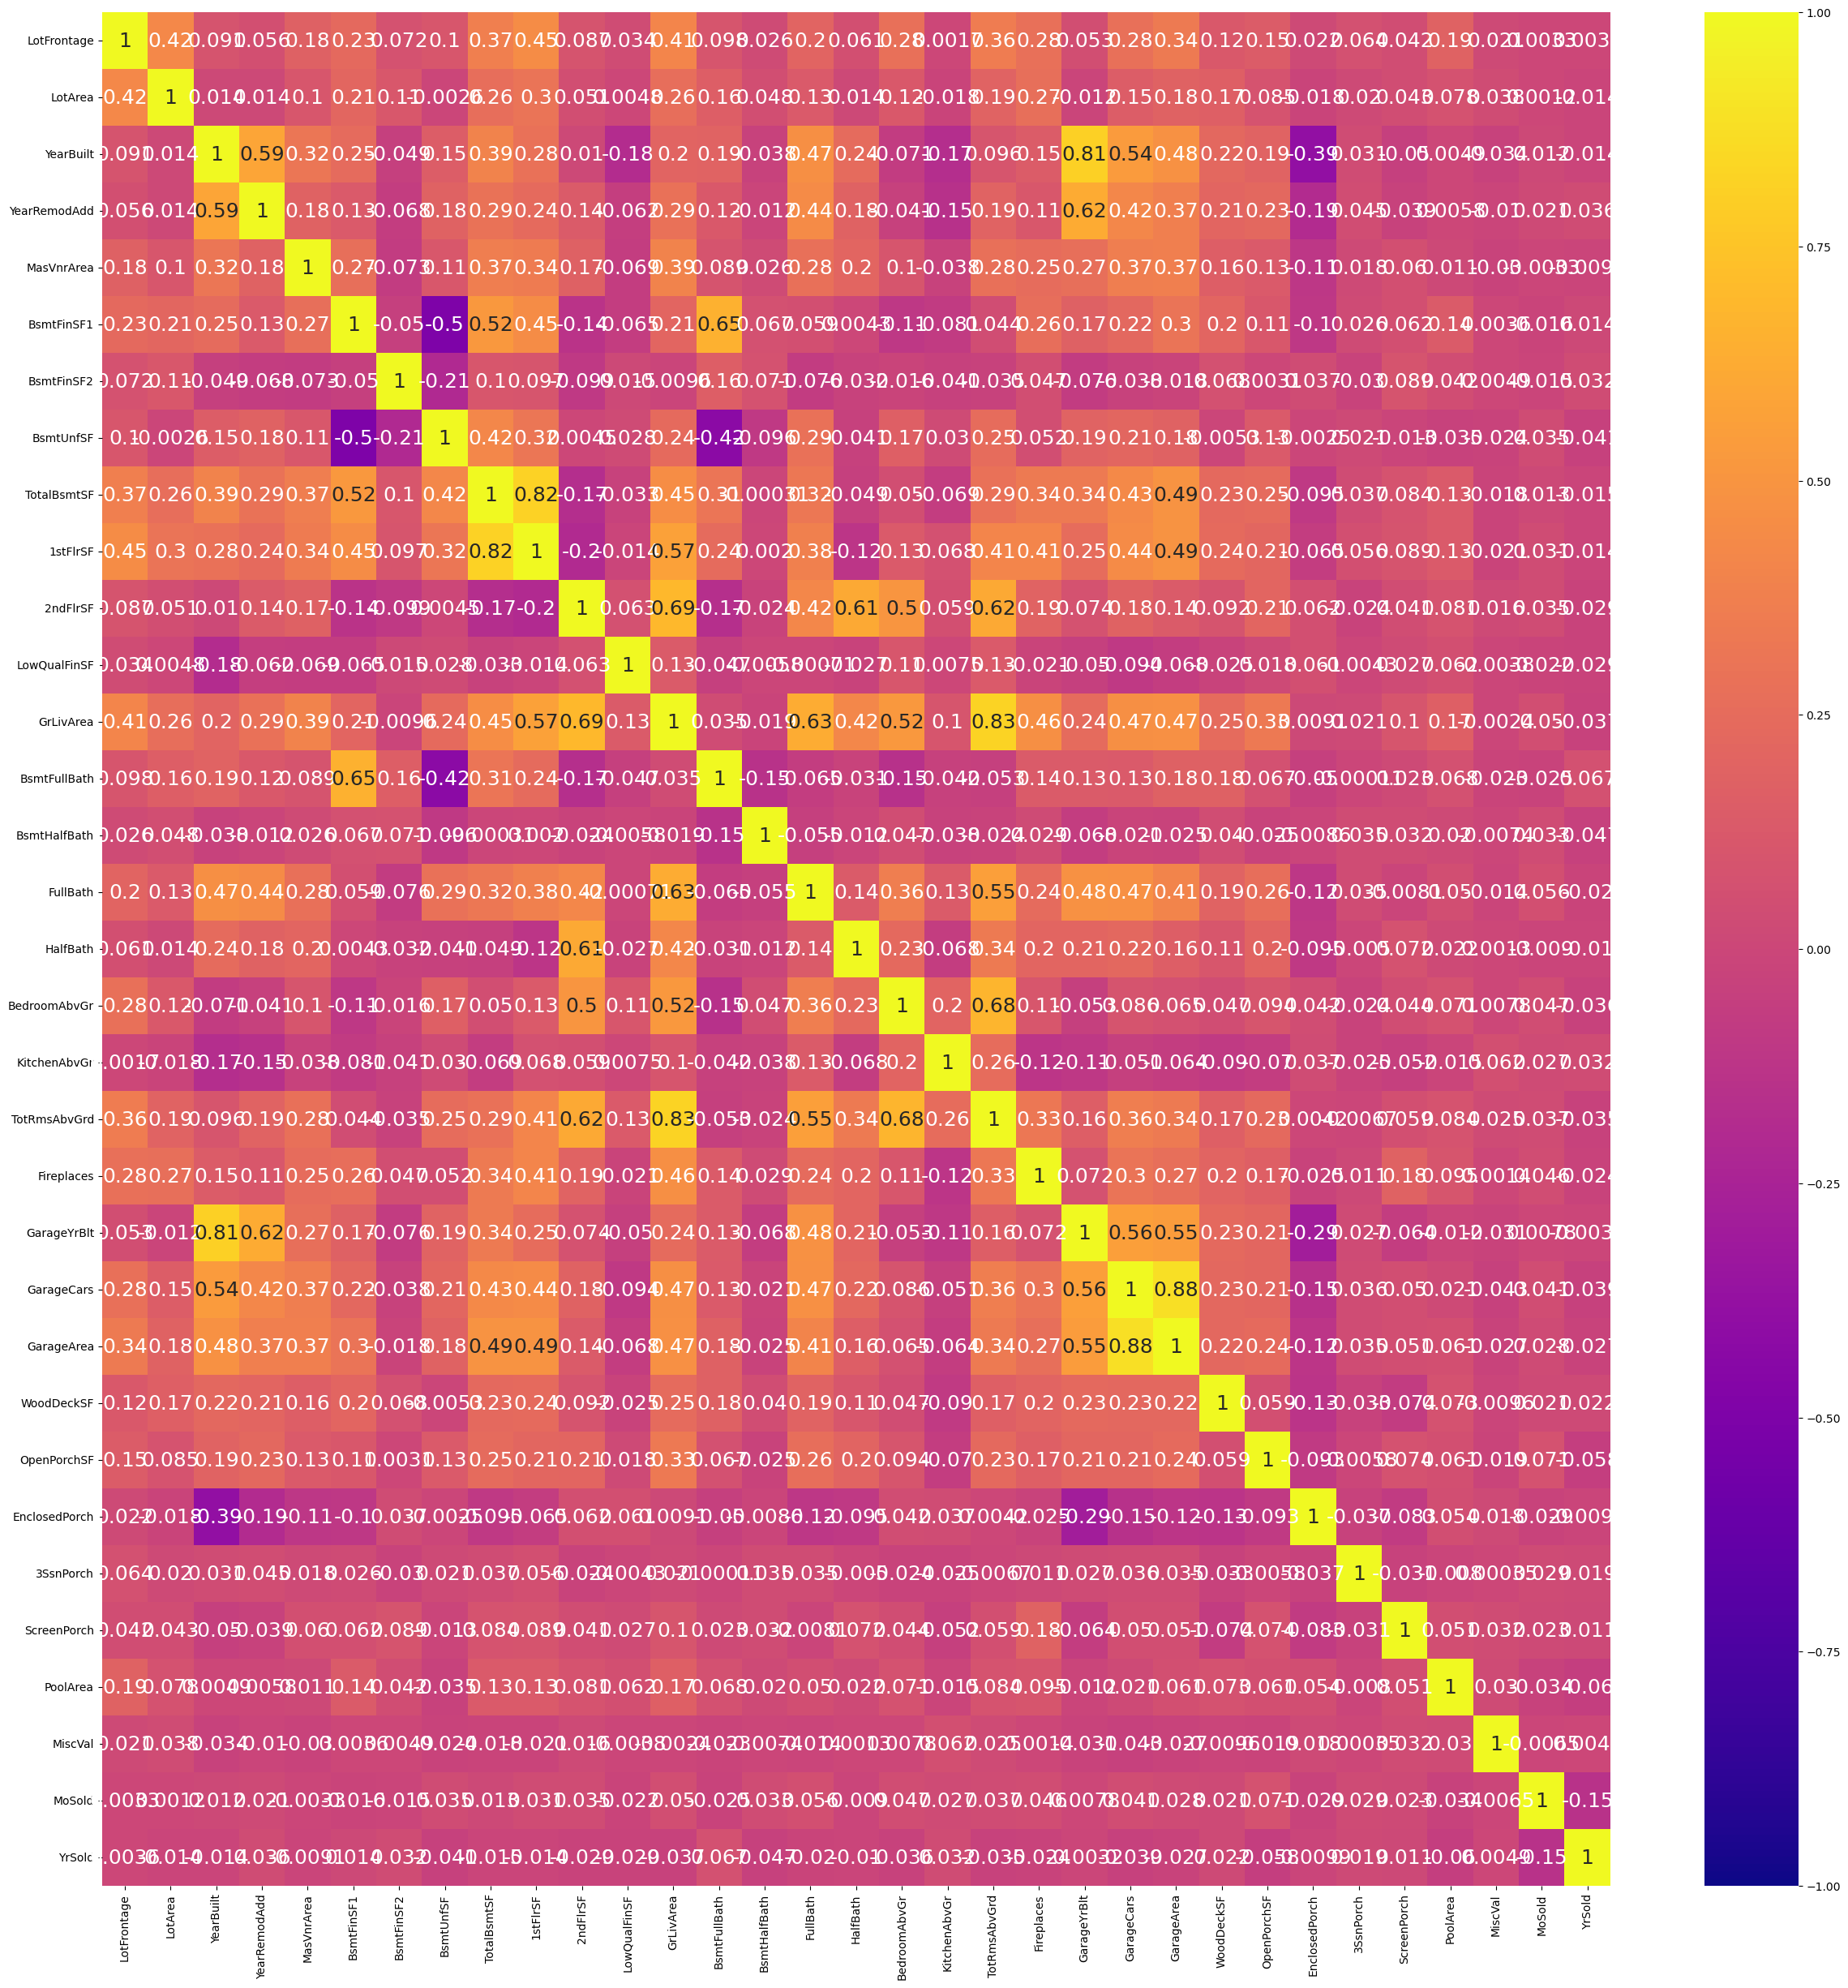

In [62]:
plt.figure(figsize=(30,30))

sns.heatmap(df_num_sc.corr(),
            cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot = True,
            annot_kws={"size": 18})
plt.show()

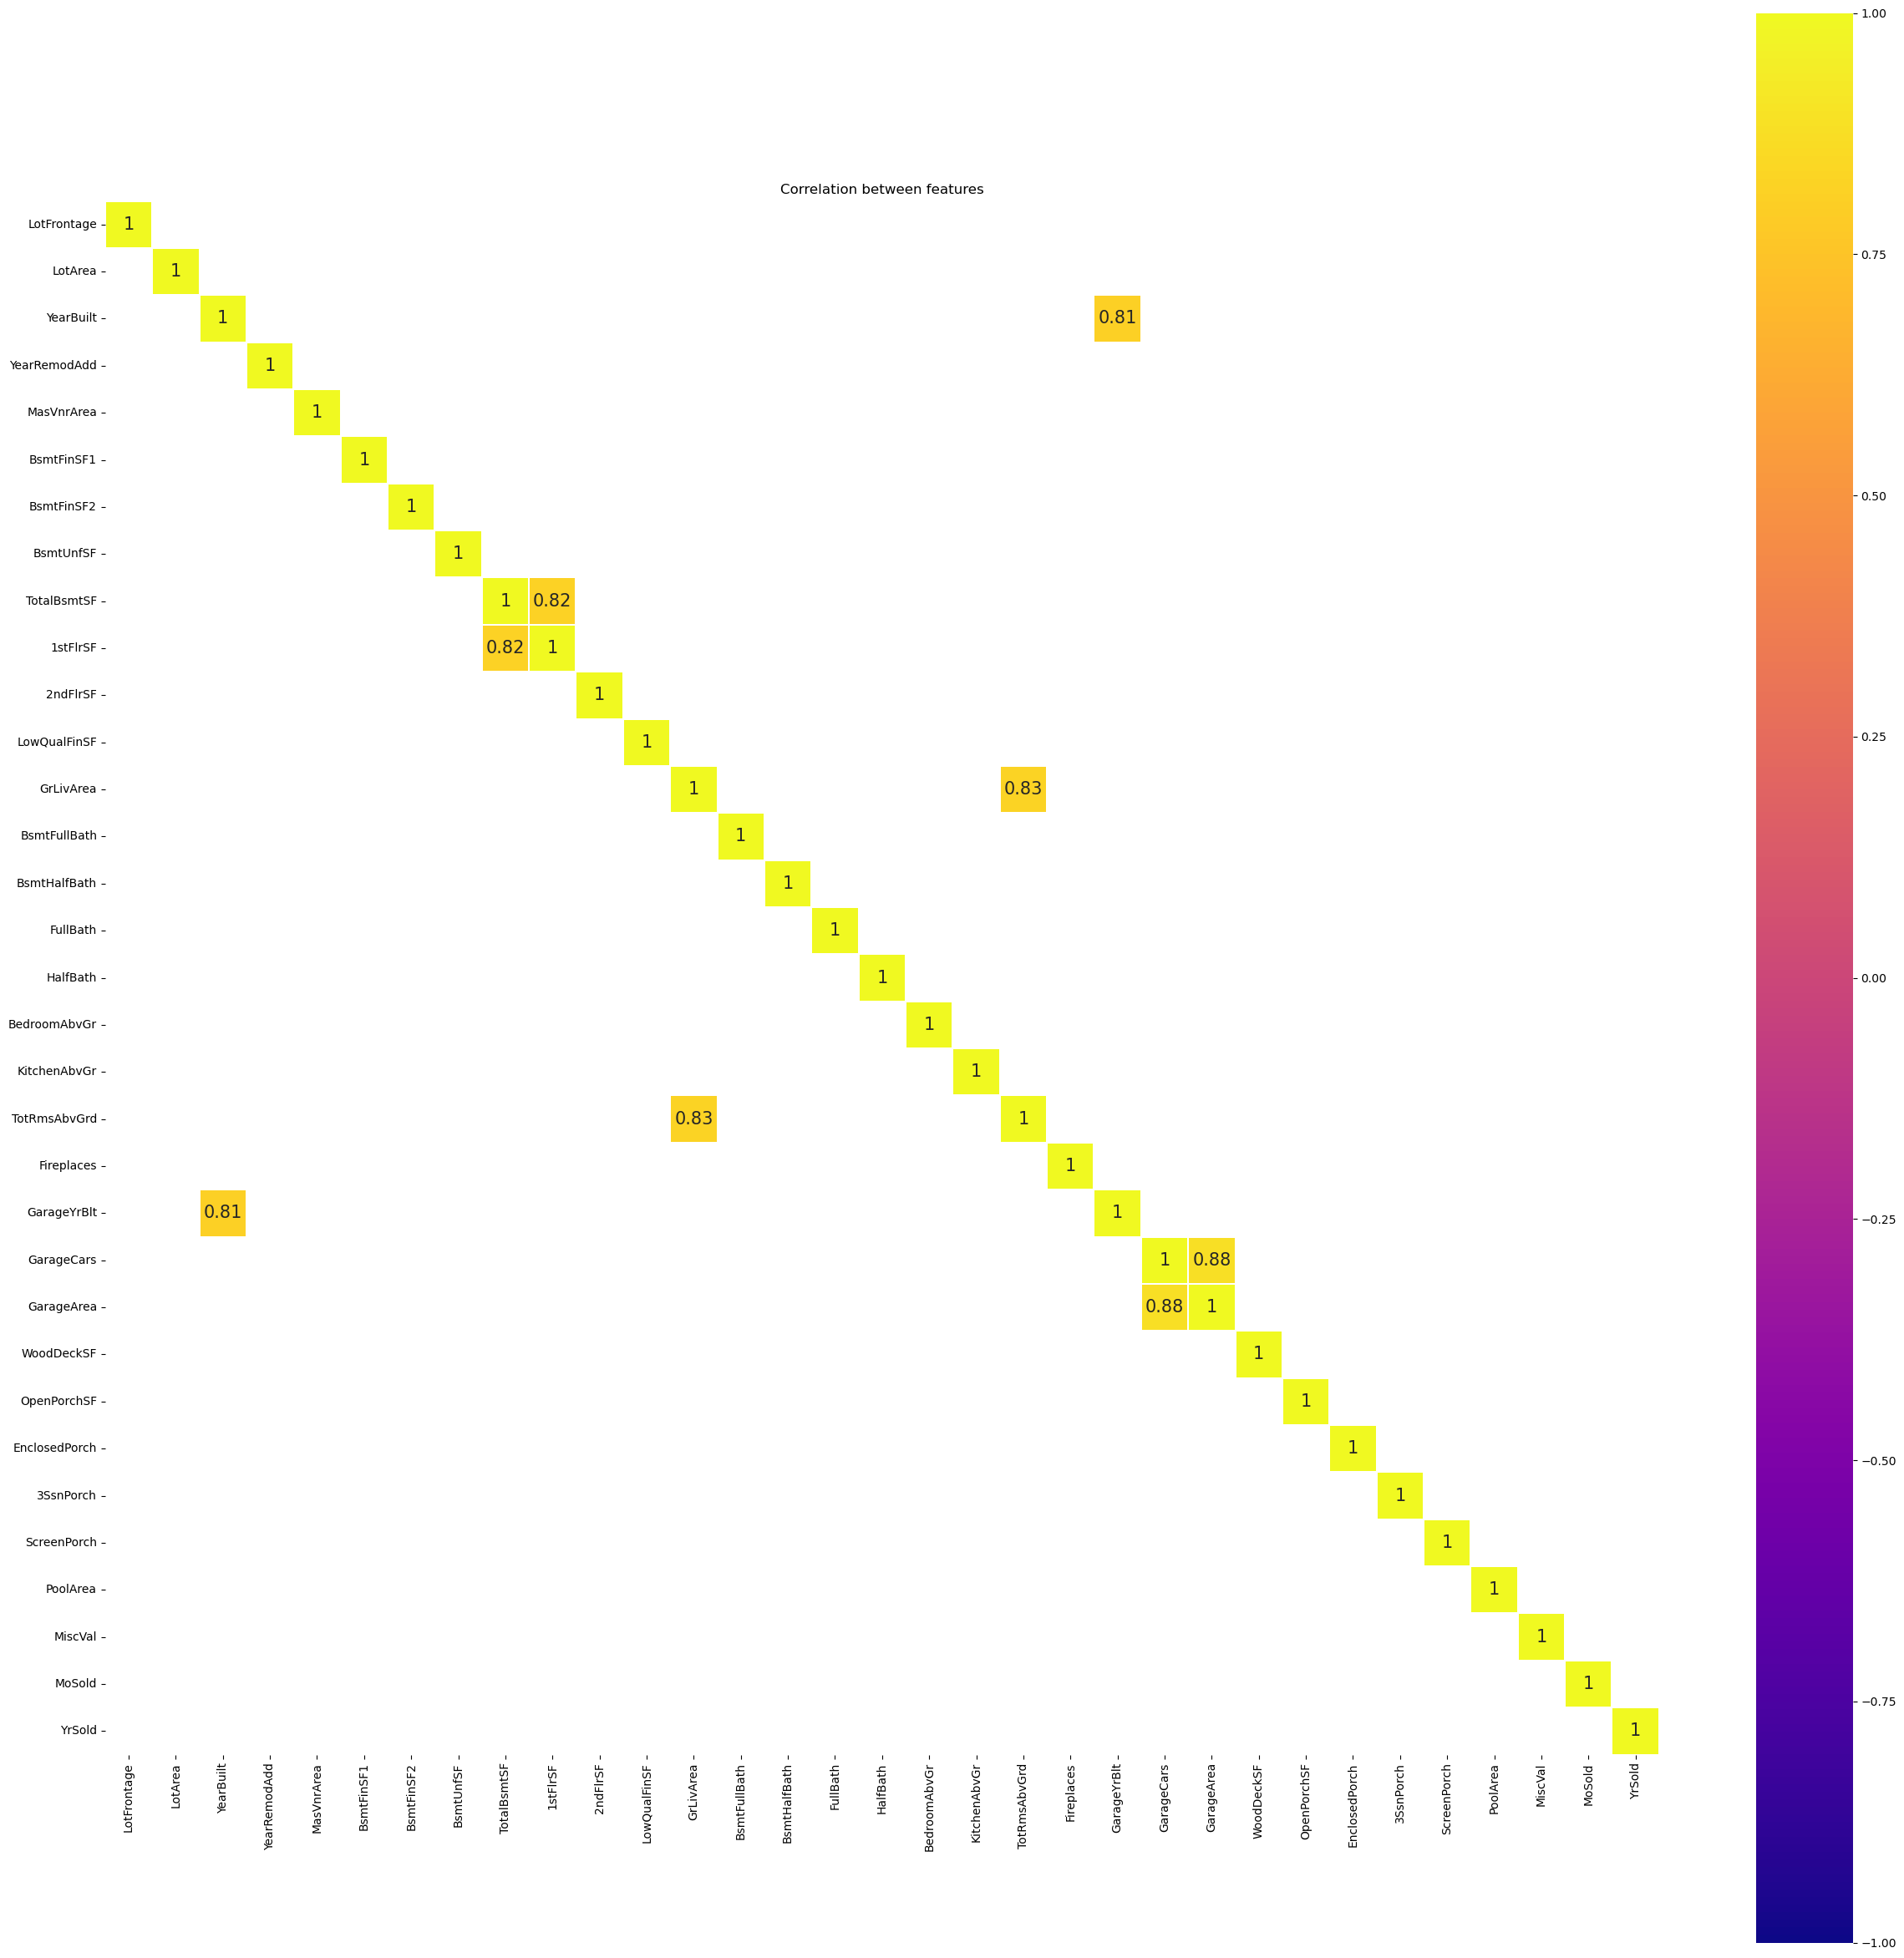

In [63]:
plt.figure(figsize=(30, 30))


sns.heatmap(df_num_sc.corr()[(df_num_sc.corr() >= 0.75) | (df_num_sc.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

Detailed report using pandas profiling

In [64]:
# pip install pandas_profiling

In [65]:
# pip install sweetviz

In [66]:
import sweetviz as sv
report2_num = sv.analyze(df_num_sc)
report2_num.show_html('report2_num_sv.html')

                                             |                                             | [  0%]   00:00 ->…

Report report2_num_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [67]:
report2_cat = sv.analyze(df_cat)
report2_cat.show_html('report2_cat_svz.html')

                                             |                                             | [  0%]   00:00 ->…

Report report2_cat_svz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Encoding Technique Starts Here

In [68]:
# pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [69]:
import category_encoders as ce

Example to explain Category Encoding - CATBOOST Technique

In [70]:
import category_encoders as ce
import pandas as pd


sample_dt = pd.DataFrame({
                      'Salary': ["Low", "Moderate", "Moderate", "High", "Low",
                                 "Moderate", "Moderate", "Moderate", "Low", "Low",
                                 "Low", "High", "Low", "Moderate", "Moderate"

                                 ],

                       'CIBIL':  [250, 650, 680, 800, 275,
                                 680, 675, 680, 200, 275,
                                 300, 820, 300, 690, 720
                                 ],

                      'Premium': [6250, 2231, 23456, 15000, 5600,
                                   5600, 7000, 4560, 8900, 9000,
                                   7688, 5600, 4580, 8900, 7800
                                 ],
                          })

In [71]:
x_sample = sample_dt.drop('Premium', axis=1)
y_sample = sample_dt['Premium']

In [72]:
sample_encode = ce.cat_boost.CatBoostEncoder()
sample_encode.fit(x_sample,y_sample)

sample_output = sample_encode.transform(x_sample)
sample_output

,Salary,CIBIL
0,7166.047619,250
1,8461.416667,650
2,8461.416667,680
3,9581.444444,800
4,7166.047619,275
5,8461.416667,680
6,8461.416667,675
7,8461.416667,680
8,7166.047619,200
9,7166.047619,275


In [73]:
#### End of encoding example

High value of Target variable will inflate the encoding value of categorical variable. Hence, transformation of Target variable helps to reduce the skewness

### Model Building

Lets Build Simple Linear Regression -Base Model

In [74]:
df_target = np.log(df_price['SalePrice'])

We have not considered any feature selection techniques

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [76]:
df_num_sc.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [77]:
def cat_boost(cat_input,target):

  catboost = ce.cat_boost.CatBoostEncoder()
  catboost.fit(cat_input,target)
  df_encode= round(catboost.transform(cat_input),2)

  return df_encode

In [78]:
def transform(TR):

  # scaling /transformation of the data
  Xtrain_sc = TR.fit_transform(Xtrain.iloc[:,0:33])
  Xtest_sc  = TR.transform(Xtest.iloc[:,0:33])

  # Category encoding
  Xtrain_en =cat_boost(Xtrain.iloc[:,33:79],ytrain)
  Xtest_en  =cat_boost(Xtest.iloc[:,33:79],ytest)

  # Output in DataFrame format-transformed data
  Xtrain_sc= pd.DataFrame(Xtrain_sc,columns = Xtrain.iloc[:,0:33].columns)
  Xtest_sc = pd.DataFrame(Xtest_sc,columns   = Xtest.iloc[:,0:33].columns)

  # Output in DataFrame format-encoded data
  Xtrain_en= pd.DataFrame(Xtrain_en,columns = Xtrain.iloc[:,33:79].columns)
  Xtest_en= pd.DataFrame(Xtest_en,columns  = Xtest.iloc[:,33:79].columns)

  # reseting the index before concatinating
  Xtrain_sc.reset_index(inplace=True)
  Xtrain_en.reset_index(inplace=True)
  Xtest_sc.reset_index(inplace=True)
  Xtest_en.reset_index(inplace=True)


  # concatinating the transformed and encoded data
  Xtrain=pd.concat([Xtrain_sc,Xtrain_en],axis=1)
  Xtest=pd.concat([Xtest_sc,Xtest_en],axis=1)


  return Xtrain,Xtest

In [79]:
df_cat_en = cat_boost(df_cat,df_target)

In [80]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,...,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


In [81]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


In [82]:
X=df_priceDataset
y=df_target

split the data -Into Train and Test

In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

Using SKLearns - Linear Regression Method

In [84]:
lr=LinearRegression()

# build the model and find the r2score with RMSE

model_lr = lr.fit(Xtrain,ytrain)

pred_train = model_lr.predict(Xtrain)

pred_test=model_lr.predict(Xtest)

In [85]:
r2_train = r2_score(ytrain,pred_train)
r2_test =  r2_score(ytest ,pred_test)

print("R2 Train: ", r2_train)
print("R2 Test:  ", r2_test)

R2 Train:  0.9145566289889837
R2 Test:   0.8431739256414078


Calculate the RMSE Values

In [86]:
# Mean Squared Error

print("RMSE Train :", np.sqrt(mean_squared_error(ytrain, pred_train)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE Train : 0.11749169905556685
RMSE Test  : 0.15566430139508708


Using the OLS Method - Statistical Way

In [87]:
import statsmodels.api as sma

temp_x = sma.add_constant(X)
x_train,x_test,y_train,y_test = train_test_split(temp_x,
                                                 y,
                                                 test_size=0.30,
                                                 random_state=0)

In [88]:
model = sma.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     133.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:20:14   Log-Likelihood:                 738.34
No. Observations:                1022   AIC:                            -1323.
Df Residuals:                     945   BIC:                            -943.1
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LotFrontage         0.0004      0.000      1.757      0.079   -4.84e-05       0.001
LotArea          1.374e-06   4.92e-07      2.791      0.005    4.08e-07    2.34e-06
YearBuilt          -0.0009      0.000     -2.255      0.024      -0.002      -0.000
YearRemodAdd        0.0016      0.000      5.277      0.000       0.001       0.002
MasVnrArea      -8.143e-06    2.6e-05     -0.313      0.755   -5.92e-05     4.3e-05
BsmtFinSF1       4.894e-05    1.2e-05      4.074      0.000    2.54e-05    7.25e-05
BsmtFinSF2       3.782e-05   2.12e-05      1.784      0.075   -3.79e-06    7.94e-05
BsmtUnfSF       -9.886e-06   1.12e-05     -0.884      0.377   -3.18e-05    1.21e-05
TotalBsmtSF      7.688e-05   1.53e-05      5.014      0.000    4.68e-05       0.000
1stFlrSF         5.379e-05   2.78e-05      1.938      0.053   -6.78e-07       0.000
2ndFlrSF         2.975e-05   2.61e-05      1.141      0.254   -2.14e-05    8.09e-05
LowQualFinSF     5.266e-05   6.78e-05      0.776      0.438   -8.05e-05       0.000
GrLivArea           0.0001   2.64e-05      5.156      0.000    8.44e-05       0.000
BsmtFullBath        0.0293      0.012      2.506      0.012       0.006       0.052
BsmtHalfBath        0.0153      0.018      0.832      0.406      -0.021       0.052
FullBath            0.0227      0.013      1.784      0.075      -0.002       0.048
HalfBath            0.0376      0.012      3.053      0.002       0.013       0.062
BedroomAbvGr        0.0183      0.008      2.324      0.020       0.003       0.034
KitchenAbvGr       -0.0484      0.026     -1.860      0.063      -0.099       0.003
TotRmsAbvGrd        0.0074      0.005      1.353      0.177      -0.003       0.018
Fireplaces          0.0345      0.016      2.222      0.027       0.004       0.065
GarageYrBlt        -0.0009      0.000     -2.550      0.011      -0.002      -0.000
GarageCars          0.0126      0.013      0.944      0.346      -0.014       0.039
GarageArea          0.0002   4.63e-05      3.299      0.001    6.19e-05       0.000
WoodDeckSF          0.0001   3.45e-05      2.992      0.003    3.55e-05       0.000
OpenPorchSF      1.574e-05   6.45e-05      0.244      0.807      -0.000       0.000
EnclosedPorch    2.256e-05   7.11e-05      0.317      0.751      -0.000       0.000
3SsnPorch           0.0002      0.000      1.346      0.179   -8.44e-05       0.000
ScreenPorch         0.0002   7.44e-05      3.144      0.002     8.8e-05       0.000
PoolArea            0.0024      0.001      2.966      0.003       0.001       0.004
MiscVal          1.451e-06    7.6e-06      0.191      0.849   -1.35e-05    1.64e-05
MoSold             -0.0016      0.001     -1.088      0.277      -0.004       0.001
YrSold             -0.0040      0.003     -1.279      0.201      -0.010       0.002
MSSubClass          0.0818      0.031      2.607      0.009

### Clustering

In [89]:
# for clustering we remove the dependent variable. Lets the original data which is cleaned and not encoded


In [90]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

Lets scale the data

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc=StandardScaler()

In [93]:
df_num_standarized = pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)

In [94]:
df_num_standarized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [95]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 11 )
cluster_errors = []


for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)

  clusters.fit(df_num_standarized)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,48180.000000
1,2,41888.451350
2,3,39364.468962
3,4,37780.633277
4,5,36163.639003
5,6,34946.704001
6,7,33883.462211
7,8,32522.776187
8,9,31572.153292
9,10,30262.102939


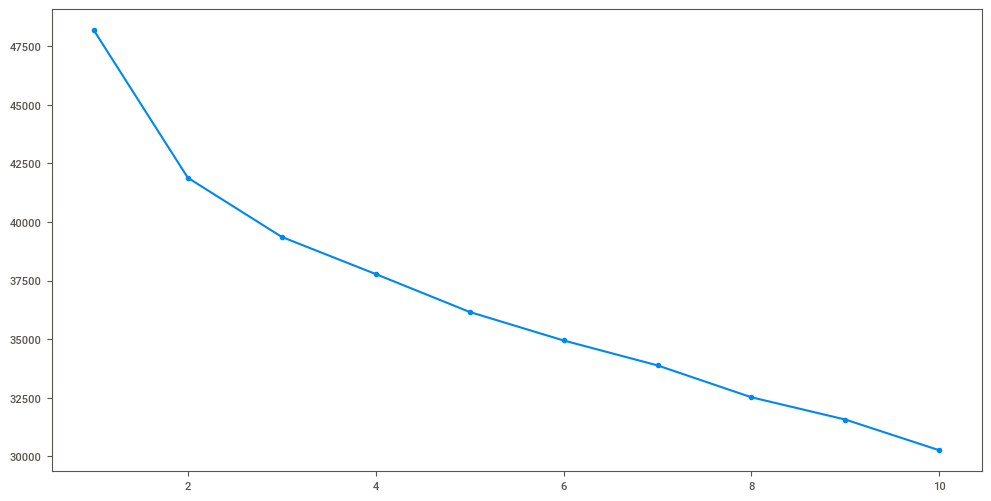

In [96]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Silhouette Score

In [97]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [98]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5,]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_num_sc)
    score = silhouette_score(df_num_sc, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.9630116148821823)
For 3 clusters the silhouette score is 0.8241806114233643)
For 4 clusters the silhouette score is 0.44085010358203947)
For 5 clusters the silhouette score is 0.4292318910234882)


### Visualization of Silhoutte Score

In [99]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [100]:
from yellowbrick.cluster import SilhouetteVisualizer

In [101]:
from sklearn.metrics import silhouette_score

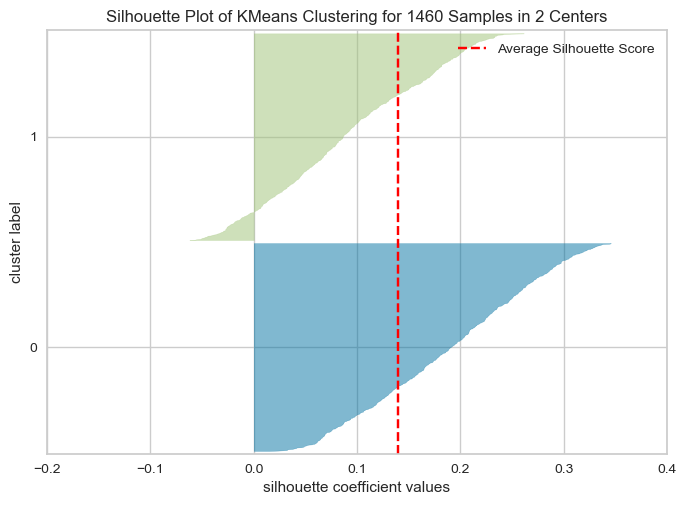

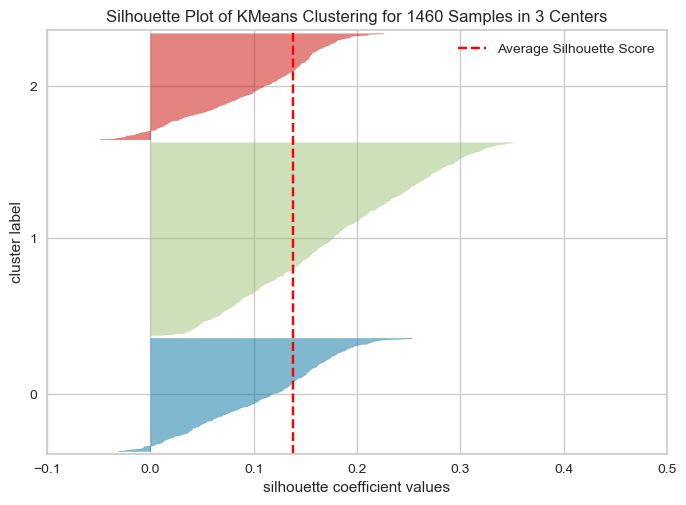

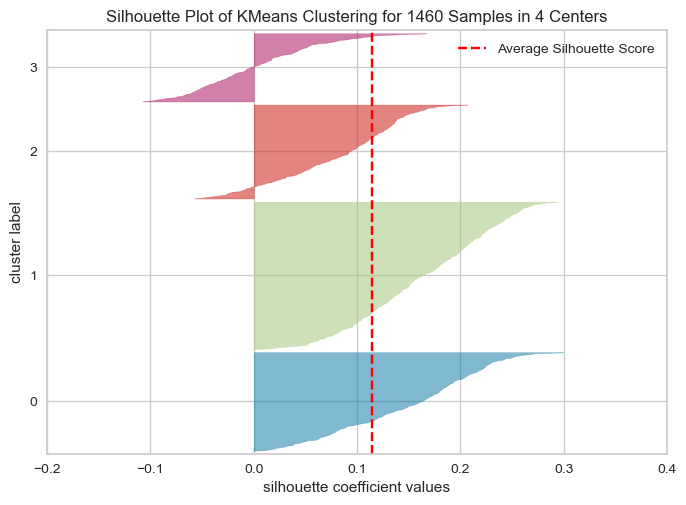

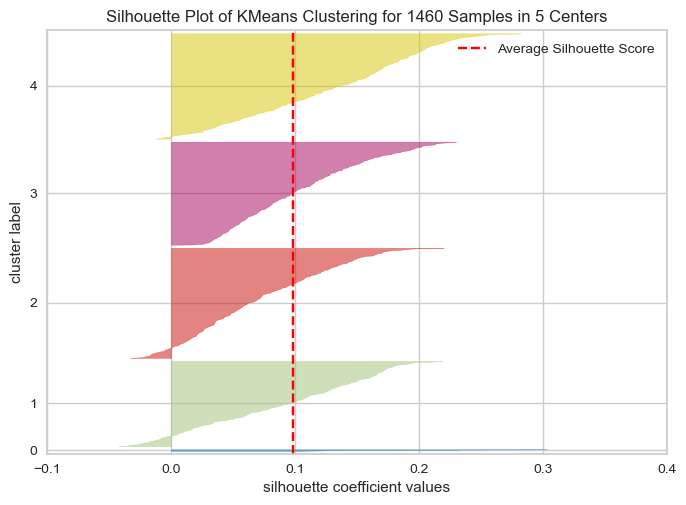

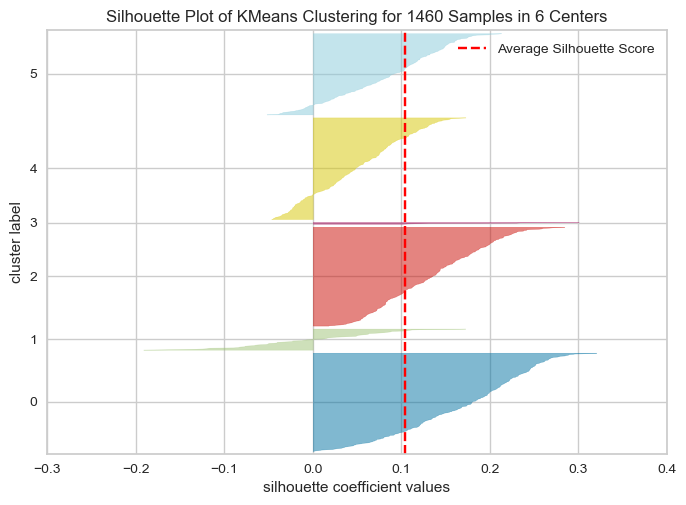

In [102]:
for i in range(2,7):
  kms=KMeans(n_clusters=i)
  kms.fit(df_num_standarized)
  model = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_num_standarized)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure

Lets take the optimal number of clusters

In [103]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df_num_standarized)

KMeans(n_clusters=3, n_init=15, random_state=2)

Labels

In [104]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [105]:
df_new_clusters = df_price.join(df_labels)

In [106]:
df_new_clusters.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,labels
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


In [107]:
# plt.figure(figsize=(50,50))
# df_new_clusters.boxplot(by = 'labels');
# plt.show()

In [108]:
df_new_clusters[df_new_clusters.labels==0].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,312.000000,400.000000,400.000000,400.000000,397.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,74.570513,11070.092500,1984.622500,1994.087500,152.979849,361.145000,26.517500,569.305000,956.967500,1076.275000,...,116.815000,71.585000,13.805000,2.537500,17.722500,5.810000,44.200000,6.480000,2007.765000,224476.36750
std,24.293916,5587.060103,28.500275,14.246482,234.077298,386.692483,128.700658,380.209765,321.998796,310.392773,...,134.348724,71.566068,57.721716,22.884555,65.010009,58.611151,451.962981,2.638561,1.326338,82515.28054
min,24.000000,1950.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,495.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,90000.00000
25%,62.750000,8713.500000,1976.000000,1991.750000,0.000000,0.000000,0.000000,254.750000,773.750000,847.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,174000.00000
50%,75.000000,10400.000000,1997.000000,1999.000000,0.000000,305.000000,0.000000,538.000000,912.000000,1024.000000,...,100.000000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,200750.00000
75%,85.000000,12378.000000,2003.000000,2004.000000,270.000000,644.250000,0.000000,846.000000,1117.000000,1234.500000,...,192.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,252758.50000
max,174.000000,53504.000000,2009.000000,2010.000000,1600.000000,2096.000000,1474.000000,1926.000000,2444.000000,2444.000000,...,728.000000,547.000000,552.000000,245.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,755000.00000


In [109]:
df_new_clusters[df_new_clusters.labels==1].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,313.000000,378.000000,378.000000,378.000000,373.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,77.226837,13264.201058,1992.579365,1996.878307,161.579088,689.933862,48.288360,802.814815,1541.037037,1595.391534,...,131.410053,63.624339,8.164021,7.589947,17.507937,1.269841,9.523810,6.460317,2007.846561,231855.156085
std,30.240007,17563.462706,17.406066,13.843038,193.279750,617.167525,178.688069,569.107843,405.852155,346.889613,...,130.570564,67.897189,39.383641,46.445183,57.545380,24.688536,113.606355,2.897866,1.328229,76149.297171
min,30.000000,2887.000000,1923.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,520.000000,1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,82500.000000
25%,62.000000,8652.000000,1977.250000,1992.250000,0.000000,16.000000,0.000000,340.000000,1316.000000,1374.250000,...,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,179900.000000
50%,75.000000,10630.000000,2002.000000,2003.000000,106.000000,704.500000,0.000000,603.000000,1494.000000,1564.500000,...,132.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,211450.000000
75%,89.000000,13119.000000,2006.000000,2006.000000,247.000000,1170.250000,0.000000,1345.000000,1686.000000,1718.750000,...,196.000000,83.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,265565.250000
max,313.000000,215245.000000,2010.000000,2010.000000,1115.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,...,857.000000,418.000000,291.000000,508.000000,396.000000,480.000000,2000.000000,12.000000,2010.000000,611657.000000


In [110]:
df_new_clusters[df_new_clusters.labels==2].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,576.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,63.701389,8669.595308,1951.623167,1972.799120,43.326979,355.514663,57.334311,435.461877,848.310850,973.412023,...,60.407625,22.639296,34.376833,1.604106,12.143695,1.794721,61.897361,6.152493,2007.828446,127145.381232
std,18.326727,4073.662592,23.820059,20.305431,103.371776,319.002194,167.391352,325.740669,284.366297,230.072450,...,106.917473,52.436540,69.952072,18.082902,48.323584,33.174731,632.082056,2.622656,1.330170,29519.089128
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,54.000000,6864.000000,1934.250000,1952.000000,0.000000,0.000000,0.000000,164.000000,714.250000,833.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,109925.000000
50%,60.000000,8500.000000,1955.500000,1969.000000,0.000000,338.000000,0.000000,402.500000,864.000000,956.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,129250.000000
75%,74.000000,10018.000000,1968.000000,1994.750000,0.000000,600.000000,0.000000,684.000000,1032.000000,1097.750000,...,105.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,144000.000000
max,153.000000,57200.000000,2007.000000,2010.000000,1047.000000,1440.000000,1120.000000,1768.000000,1768.000000,1811.000000,...,736.000000,523.000000,330.000000,320.000000,385.000000,648.000000,15500.000000,12.000000,2010.000000,250000.000000


## Principal Component Analysis

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca_hp = PCA().fit(df_num_standarized)

In [113]:
pca_hp.explained_variance_

array([6.55140008e+00, 3.14986432e+00, 2.48600899e+00, 1.88432690e+00,
       1.30983403e+00, 1.15589517e+00, 1.12442318e+00, 1.11708805e+00,
       1.08067584e+00, 1.03637664e+00, 1.01637558e+00, 9.96032548e-01,
       9.51338274e-01, 9.05082971e-01, 8.93799250e-01, 8.52767424e-01,
       8.20315876e-01, 7.36918410e-01, 7.04323197e-01, 6.45078964e-01,
       6.18234253e-01, 5.83710687e-01, 4.87396614e-01, 4.23489391e-01,
       3.87056604e-01, 2.99233052e-01, 2.28382612e-01, 2.00239444e-01,
       1.51784285e-01, 1.30544068e-01, 9.46215296e-02, 1.29203585e-30,
       5.23445153e-32])

In [114]:
pca_hp.components_

array([[ 1.85909004e-01,  1.23787912e-01,  2.36999863e-01, ...,
        -8.79816874e-03,  2.13195754e-02, -1.35226796e-02],
       [ 3.88202169e-02, -1.05753683e-02, -2.28344719e-01, ...,
         2.82218496e-02,  3.01367848e-02, -3.80426302e-02],
       [ 2.81770580e-01,  2.89235231e-01, -3.13595880e-01, ...,
         4.10372593e-02, -1.67502844e-02,  5.97972135e-03],
       ...,
       [ 5.09080280e-02, -1.08506323e-02, -1.97477942e-01, ...,
         1.35496813e-02, -4.75549683e-03,  6.03440316e-03],
       [-7.49735327e-17, -1.26836953e-17, -3.08794066e-17, ...,
        -1.45875754e-17, -5.03956092e-17, -1.21344232e-16],
       [-0.00000000e+00, -1.53209523e-16, -9.30165091e-17, ...,
        -7.78427783e-17, -1.60168389e-16, -2.56633050e-17]])

In [115]:
pca_hp.n_components_

33

In [116]:
var=np.cumsum(np.round(pca_hp.explained_variance_ratio_,decimals=3)*100)
var

array([ 19.8,  29.3,  36.8,  42.5,  46.5,  50. ,  53.4,  56.8,  60.1,
        63.2,  66.3,  69.3,  72.2,  74.9,  77.6,  80.2,  82.7,  84.9,
        87. ,  89. ,  90.9,  92.7,  94.2,  95.5,  96.7,  97.6,  98.3,
        98.9,  99.4,  99.8, 100.1, 100.1, 100.1])

In [117]:
# Considering min of variance captured(above 80%), we are considering only 2 PCA dimensions
# This reduces the dimension from 33 to 16

# The 16 pca which the linear combination of 33 columns(features). It take the coefficients(of components) and
# multiplies with scaled data(df_num_standardized) to get the final set of pc's

pca_hp_new = PCA(n_components=16)
data_reduced = pca_hp_new.fit_transform(df_num_standarized)
data_reduced.transpose()

array([[ 1.27685713,  0.1884254 ,  1.46190215, ...,  0.61127846,
        -2.6587497 , -0.58903331],
       [ 0.13021237, -1.01345416,  0.0551311 , ...,  3.21762279,
        -1.77829805, -1.37660314],
       [-1.47303905,  0.82605281, -1.32302641, ...,  0.92827683,
         2.13415223,  1.64124994],
       ...,
       [-0.4272692 ,  0.59050581, -0.00565506, ...,  1.83594783,
         0.78393365,  0.0945913 ],
       [ 0.5198061 , -0.30201048,  0.09202558, ..., -1.96114289,
        -1.89515668, -0.72554448],
       [-0.92284587, -0.55646373,  0.05329443, ..., -0.64447249,
         1.14824618,  1.1489583 ]])

In [118]:
pca_df_hp= pd.DataFrame(data_reduced)
pca_df_hp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.276857,0.130212,-1.473039,-2.325791,1.356097,-0.679944,-0.270443,0.052314,-0.359321,0.482206,-0.228896,-0.444641,0.769437,-0.427269,0.519806,-0.922846
1,0.188425,-1.013454,0.826053,0.162765,-1.113036,1.374010,2.885953,-0.377507,0.034100,-0.109534,-0.621848,-2.579055,0.060581,0.590506,-0.302010,-0.556464
2,1.461902,0.055131,-1.323026,-1.725044,0.084936,0.499715,-0.449597,0.008764,-0.114184,0.021974,0.111172,0.715228,0.149694,-0.005655,0.092026,0.053294
3,-0.599673,1.090373,0.956621,-0.084356,0.462144,-0.648917,-0.868056,0.983447,-2.809038,-1.207400,1.402006,0.423776,2.742770,1.435299,0.120098,-0.242286
4,4.160758,0.958771,-0.580685,-1.699239,0.126551,1.324595,-0.106893,-0.115863,-0.103738,-0.683815,0.132710,0.930443,-0.048389,0.452055,0.194293,0.466833


In [119]:
pca_df_hp.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_df_hp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.276857,0.130212,-1.473039,-2.325791,1.356097,-0.679944,-0.270443,0.052314,-0.359321,0.482206,-0.228896,-0.444641,0.769437,-0.427269,0.519806,-0.922846
1,0.188425,-1.013454,0.826053,0.162765,-1.113036,1.374010,2.885953,-0.377507,0.034100,-0.109534,-0.621848,-2.579055,0.060581,0.590506,-0.302010,-0.556464
2,1.461902,0.055131,-1.323026,-1.725044,0.084936,0.499715,-0.449597,0.008764,-0.114184,0.021974,0.111172,0.715228,0.149694,-0.005655,0.092026,0.053294
3,-0.599673,1.090373,0.956621,-0.084356,0.462144,-0.648917,-0.868056,0.983447,-2.809038,-1.207400,1.402006,0.423776,2.742770,1.435299,0.120098,-0.242286
4,4.160758,0.958771,-0.580685,-1.699239,0.126551,1.324595,-0.106893,-0.115863,-0.103738,-0.683815,0.132710,0.930443,-0.048389,0.452055,0.194293,0.466833


In [120]:
corr = pca_df_hp.corr()
corr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
PC0,1.000000e+00,3.784061e-17,1.123784e-17,-3.222647e-17,6.027185e-17,-2.561971e-17,7.401623e-18,4.168621e-17,1.755935e-17,2.765534e-17,-2.707102e-17,-4.184192e-17,1.566692e-17,-1.078071e-16,3.767259e-17,2.507907e-17
PC1,3.784061e-17,1.000000e+00,1.023546e-16,1.236876e-16,-1.524738e-17,-6.659880e-18,-3.962509e-17,4.007950e-17,-4.371869e-18,8.086330e-18,-4.890812e-19,-2.141596e-17,3.411169e-17,3.289940e-17,1.256231e-17,-1.467176e-17
PC2,1.123784e-17,1.023546e-16,1.000000e+00,2.513101e-16,-2.487983e-17,3.329003e-16,1.747712e-17,4.155290e-17,-2.692675e-17,-5.954351e-17,-1.011287e-16,-6.479951e-17,1.830787e-16,-4.895387e-17,-4.757736e-17,-1.024344e-17
PC3,-3.222647e-17,1.236876e-16,2.513101e-16,1.000000e+00,-9.202849e-18,-3.529837e-16,-1.133369e-16,3.125931e-17,1.273396e-16,-2.787969e-17,4.310890e-17,1.361115e-16,-6.410892e-17,1.174399e-16,4.667354e-17,2.040994e-17
PC4,6.027185e-17,-1.524738e-17,-2.487983e-17,-9.202849e-18,1.000000e+00,5.521307e-16,-3.900696e-16,3.517164e-16,-4.296101e-16,1.470809e-16,-1.489254e-16,-2.071075e-17,1.571950e-16,-2.083974e-16,-2.239943e-16,1.793522e-16
PC5,-2.561971e-17,-6.659880e-18,3.329003e-16,-3.529837e-16,5.521307e-16,1.000000e+00,-9.765069e-17,-8.082755e-17,-2.406106e-16,-2.209484e-16,2.109231e-16,-3.104100e-16,3.496191e-16,-1.947791e-17,-1.717769e-16,-3.947200e-17
PC6,7.401623e-18,-3.962509e-17,1.747712e-17,-1.133369e-16,-3.900696e-16,-9.765069e-17,1.000000e+00,5.067783e-16,-5.180065e-16,6.282123e-16,-1.444619e-16,9.592002e-17,-1.165408e-16,5.016119e-17,1.805023e-16,3.254489e-16
PC7,4.168621e-17,4.007950e-17,4.155290e-17,3.125931e-17,3.517164e-16,-8.082755e-17,5.067783e-16,1.000000e+00,4.112479e-16,2.060829e-16,1.829635e-16,8.746943e-18,2.362076e-18,1.151908e-16,-1.194093e-16,-1.044725e-16
PC8,1.755935e-17,-4.371869e-18,-2.692675e-17,1.273396e-16,-4.296101e-16,-2.406106e-16,-5.180065e-16,4.112479e-16,1.000000e+00,-1.495587e-17,2.099808e-16,-3.578503e-16,-2.173393e-16,4.972567e-16,1.172233e-16,-1.867534e-16
PC9,2.765534e-17,8.086330e-18,-5.954351e-17,-2.787969e-17,1.470809e-16,-2.209484e-16,6.282123e-16,2.060829e-16,-1.495587e-17,1.000000e+00,4.850806e-16,-9.362018e-19,4.073931e-16,2.500464e-16,4.394359e-16,-2.905873e-16


<Axes: >

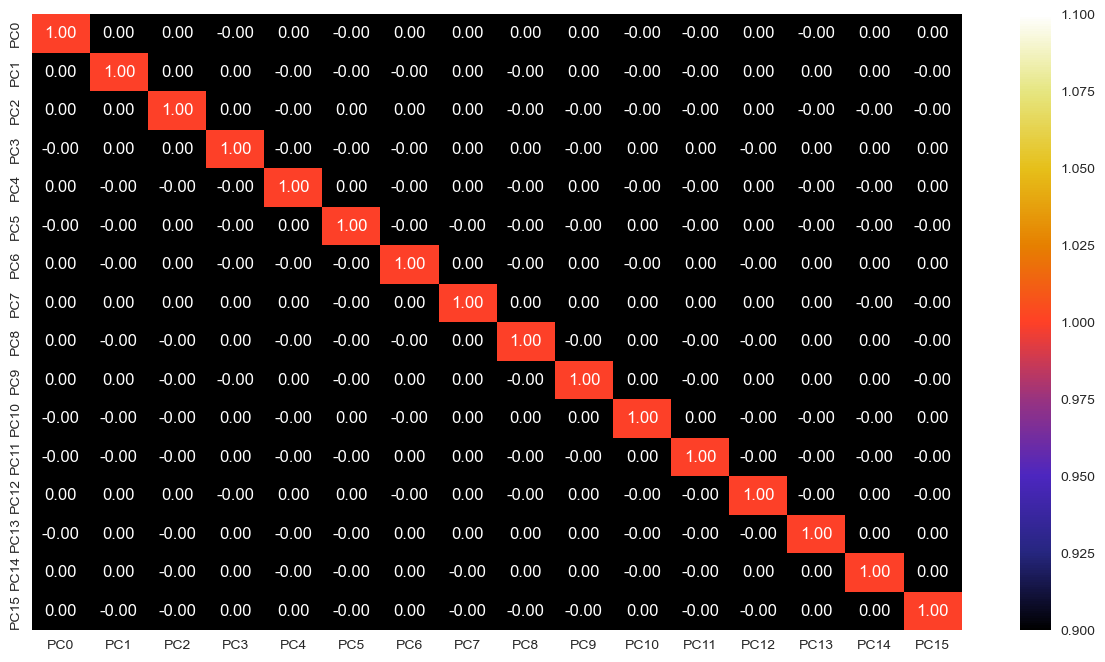

In [121]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True, fmt='.2f',cmap='CMRmap',vmin=1,vmax=1)

#### This lines of code will come after OLS Method

Finding the VIF- Variation inflation Factor

In [122]:
# import statsmodels.api as sma
# temp_x = sma.add_constant(X)


# X_train,X_test,y_train,y_test =train_test_split(temp_x,
#                                            y,
#                                            test_size=0.30,
#                                            random_state=0)

### Check the performance by scaling the data

In [123]:
df_priceDataset= pd.concat([df_num_sc,df_cat],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,TA,TA,Y,WD,Normal,0,0,0,0,0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,TA,TA,Y,WD,Normal,0,0,0,0,1
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,TA,TA,Y,WD,Normal,0,0,0,0,1
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,TA,TA,Y,WD,Abnorml,0,0,0,0,1
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,TA,TA,Y,WD,Normal,0,0,0,0,1


In [124]:
from sklearn.preprocessing import StandardScaler
X=df_priceDataset
y=df_target

In [125]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [126]:
sc=StandardScaler()

Xtrain_sc = sc.fit_transform(Xtrain.iloc[:,0:33])
Xtest_sc  = sc.transform(Xtest.iloc[:,0:33])

Xtrain_en =cat_boost(Xtrain.iloc[:,33:79],ytrain)
Xtest_en =cat_boost(Xtest.iloc[:,33:79],ytest)

In [127]:
Xtrain_sc= pd.DataFrame(Xtrain_sc,columns = Xtrain.iloc[:,0:33].columns)
Xtest_sc = pd.DataFrame(Xtest_sc,columns   = Xtest.iloc[:,0:33].columns)

Xtrain_en= pd.DataFrame(Xtrain_en,columns = Xtrain.iloc[:,33:79].columns)
Xtest_en= pd.DataFrame(Xtest_en,columns  = Xtest.iloc[:,33:79].columns)

In [128]:
Xtrain_sc.reset_index(inplace=True)
Xtrain_en.reset_index(inplace=True)
Xtest_sc.reset_index(inplace=True)
Xtest_en.reset_index(inplace=True)

In [129]:
Xtrain=pd.concat([Xtrain_sc,Xtrain_en],axis=1)
Xtest=pd.concat([Xtest_sc,Xtest_en],axis=1)

In [130]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)


print("Training R2")
print(lr.score(Xtrain,ytrain))


print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.9129903113545946
Testing R2
0.8534531867269044


Inference:-
1. Scaling of the data does not have any impact on the performance of the model.

Check the performance of model using different algorithms

In [131]:
from sklearn import tree

# all the regressors for Randomforest, Neural Netwrok
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [132]:
# performance tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [133]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes

rfr = RandomForestRegressor(random_state=123)

dtr = tree.DecisionTreeRegressor(random_state=123)



In [134]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


In [135]:
X=df_priceDataset
y=df_target

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

### Decision Tree

In [137]:
 dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=123)

Accuracy score for the decision tree model

In [138]:
dtr.score(x_train,y_train)

1.0

In [139]:
dtr.score(x_test,y_test)

0.7133637519761262

RMSE for the decision tree model

In [140]:
np.sqrt(mean_squared_error(y_train,dtr.predict(x_train)))

0.0

In [141]:
np.sqrt(mean_squared_error(y_test,dtr.predict(x_test)))

0.20376659176192086

Fine Tune the model using Grid Search CV

In [142]:
# we now fine tune the models.....

param_grid = {
    'max_depth': [10,15,20,25,30], # 3,5,7,9
    'min_samples_leaf': [3, 15,30], # this is 1-3 % of train data
    'min_samples_split': [15,30,35,40,50], # 3 times the min sample leaf
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 35}


In [143]:
dtr = tree.DecisionTreeRegressor(max_depth=10,
                                 min_samples_split=15,
                                 min_samples_leaf=15,
                                 random_state=123)


In [144]:
 dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=15,
                      random_state=123)

In [145]:
print("Score for training",dtr.score(x_train,y_train))
print("Score for testing",dtr.score(x_test,y_test))

Score for training 0.869350825929475
Score for testing 0.7688365507515142


In [146]:
print("RMSE for train",  np.sqrt(mean_squared_error(y_train,dtr.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,dtr.predict(x_test))))

RMSE for train 0.14703474812239004
RMSE for test 0.18298985341250762


### Random Forest

In [147]:
rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=123)

In [148]:
print("score for training", rfr.score(x_train,y_train))
print("score for testing",  rfr.score(x_test,y_test))

score for training 0.9812303076094235
score for testing 0.8770383306009768


In [149]:
print("RMSE for train",  np.sqrt(mean_squared_error(y_train, rfr.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  rfr.predict(x_test))))

RMSE for train 0.05573079332093211
RMSE for test 0.13346036295026806


Fine Tune the model using Grid Search CV

In [150]:
# create a grid search for random forest
param_grid = {
    'max_depth': [7,10],  # 3,5,7,9
    'max_features': [4, 6],   # SQRT of number of columns
    'min_samples_leaf': [3, 15,30],  # 1-3% of the total training data
    'min_samples_split': [30, 50,100],  # 3 times the min_sample_leaf
    'n_estimators': [300, 500] # oob error rate
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [152]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [153]:
rfr = RandomForestRegressor(n_estimators=500,
                            max_depth=10,
                            max_features=6,
                            min_samples_split=30,
                            min_samples_leaf=3,
                            random_state=123)

In [154]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=500, random_state=123)

In [155]:
print("Score for training",rfr.score(x_train,y_train))
print("Score for testing",rfr.score(x_test,y_test))

Score for training 0.8843612216579881
Score for testing 0.8543418592972696


In [156]:
print("RMSE for train",  np.sqrt(mean_squared_error(y_train, rfr.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  rfr.predict(x_test))))

RMSE for train 0.13833064282149415
RMSE for test 0.14525624303238469


### Stochastic Gradient Descent

In [157]:
from sklearn.linear_model import SGDRegressor

In [158]:
sgd = SGDRegressor()

In [159]:
sgd.fit(x_train,y_train)


print("RMSE for train",  np.sqrt(mean_squared_error(y_train, sgd.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  sgd.predict(x_test))))

RMSE for train 5.498372381336395e+16
RMSE for test 5.7998256884233576e+16


### GridSearchCV for Stochastic Gradient Descent

In [160]:
sgd = SGDRegressor()
estimator =sgd

params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'penalty'  :['l1','l2','elasticnet'],
         'loss'     :['squared_error','huber'],
          'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10]})

In [161]:
grid_sgd= GridSearchCV(estimator=sgd,
                       param_grid=params,
                       cv=5)

grid_sgd.fit(x_train,y_train)
print(grid_sgd.best_params_)

{'alpha': 10, 'l1_ratio': 0.8, 'loss': 'huber', 'penalty': 'elasticnet'}


In [162]:
sgd = SGDRegressor(alpha=1,
                   l1_ratio=0.3,
                   loss='huber',
                   penalty='l1'
                            )

In [163]:
sgd.fit(x_train,y_train)


print("RMSE for train",  np.sqrt(mean_squared_error(y_train, sgd.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  sgd.predict(x_test))))

RMSE for train 7925.916852902008
RMSE for test 8341.018896899595


###  Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gbm= GradientBoostingRegressor()
gbm.fit(x_train,y_train)

print("RMSE for train",  np.sqrt(mean_squared_error(y_train, gbm.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  gbm.predict(x_test))))

RMSE for train 0.07767124741869981
RMSE for test 0.1164047363555299


GridSearchCV for GradientBoosting

In [166]:
params=({'n_estimators'     :[100,200,300],
         'learning_rate'    :[0.1,0.01],
         'loss'             :['squared_error','huber'],
         'criterion'        :['friedman_mse', 'squared_error'],
         'min_samples_split': [30, 50,100]

                            })

In [167]:
grid_gbm= GridSearchCV(estimator=gbm,
                       param_grid=params,
                       cv=5)

grid_gbm.fit(x_train,y_train)
print(grid_gbm.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'huber', 'min_samples_split': 50, 'n_estimators': 300}


In [168]:
gbm = GradientBoostingRegressor(n_estimators=300 ,
                               learning_rate=0.1 ,
                               loss='squared_error',
                               criterion='friedman_mse',
                               min_samples_split = 100
                            )

In [169]:
gbm.fit(x_train,y_train)


print("RMSE for train",  np.sqrt(mean_squared_error(y_train, gbm.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  gbm.predict(x_test))))

RMSE for train 0.061256046376904676
RMSE for test 0.1165720674399696


### Xtreme Gradient Boosting

In [170]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [171]:
from xgboost import XGBRegressor

In [172]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [173]:
print("RMSE for train",  np.sqrt(mean_squared_error(y_train, xgb.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  xgb.predict(x_test))))

RMSE for train 0.004292879685489078
RMSE for test 0.12789224931459203


GridSearchCV for Xtreme Gardient Boosting

In [174]:
params=({'n_estimators'     :[100,200,300],
         'learning_rate'    :[0.1],
         'colsample_bytree' :[0.5,0.8],
         'max_depth'        : [2,4,6]
                            })

In [175]:
grid_xgb= GridSearchCV(estimator=xgb,
                       param_grid=params,
                       cv=5)

grid_xgb.fit(x_train,y_train)
print(grid_xgb.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [176]:
xgb = XGBRegressor(n_estimators=300 ,
                   learning_rate=0.1 ,
                   colsample_bytree=0.5,
                   max_depth = 2
                            )

In [177]:
xgb.fit(x_train,y_train)


print("RMSE for train",  np.sqrt(mean_squared_error(y_train, xgb.predict(x_train))))
print("RMSE for test",   np.sqrt(mean_squared_error(y_test,  xgb.predict(x_test))))

RMSE for train 0.081392776260592
RMSE for test 0.11624096656240389


Feature Selection and use of PipeLine

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [179]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_priceDataset
y=df_target

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [181]:
pipe = Pipeline((
("sfm",SelectFromModel(estimator=RandomForestRegressor(),max_features=70)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.8487468921448417
Testing R2
0.7904063913667995


#### Scaling with PipeLine and Cross Val Score

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [183]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)


X=df_priceDataset
y=df_target

In [184]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [185]:
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))

print("Testing R2")
print(pipe.score(Xtest,ytest))

print("Series of score 10")
CrossValScore = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)


print("Mean R2")
print(np.mean(CrossValScore))

Training R2
0.9145566436776277
Testing R2
0.8431774121927236
Series of score 10
[0.90536412 0.76766706 0.85781854 0.8524516  0.87637052 0.9077345
 0.88687889 0.9237716  0.91949543 0.89991399]
Mean R2
0.8797466238758236


#### Use of Column Transformer - Scaling and Encoding the variables

In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

column_trans = ColumnTransformer([
            ('catboost',ce.cat_boost.CatBoostEncoder(),make_column_selector(dtype_exclude=np.number))])

In [187]:
df_cat_en =pd.DataFrame(column_trans.fit_transform(df_cat,df_target),columns=df_cat.columns)
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051
2,12.135873,12.126919,12.126919,12.024051,12.126919,12.126919,12.135873,12.126919,12.135873,12.135873,...,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.066531
3,12.024051,12.174481,12.174481,12.170609,12.174481,12.174481,12.024051,12.174481,12.024051,12.196304,...,12.174481,12.174481,12.174481,12.174481,12.024051,12.174481,12.174481,12.174481,12.174481,12.150076
4,12.196304,12.109464,12.109464,12.063538,12.109464,12.109464,12.066531,12.109464,12.024051,12.109577,...,12.109464,12.109464,12.109464,12.109464,12.174481,12.109464,12.109464,12.109464,12.109464,12.074907


In [188]:
column_scaled = ColumnTransformer([
            ('scaled',StandardScaler(),make_column_selector(dtype_include=np.number))])

In [189]:
df_num_scaled =pd.DataFrame(column_scaled.fit_transform(df_num_sc,df_target),columns=df_num_sc.columns)
df_num_scaled.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


Decision Tree and PipeLine

In [190]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)

X=df_priceDataset
y=df_target

In [192]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [193]:
df_num_sc.isnull().sum().sum()

0

In [194]:
Xtrain.isnull().sum().sum()

0

In [195]:
pipe = Pipeline((
("dt", DecisionTreeRegressor(max_depth=5)),
))


pipe.fit(Xtrain,ytrain)

print("Training score R2")
print(pipe.score(Xtrain,ytrain))

print("Testing Score R2")
print(pipe.score(Xtest,ytest))

CrossValScore = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)

print("Mean Value R2")
print(np.mean(CrossValScore))

Training score R2
0.857840446607159
Testing Score R2
0.6865887368526599
[0.69026993 0.67314138 0.69047852 0.71504068 0.77230641 0.71279176
 0.66537643 0.62406108 0.69274623 0.71982988]
Mean Value R2
0.695604229599581


### Application of RFE -Feature selection using Pipeline

In [196]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)

X=df_priceDataset
y=df_target

In [197]:
from sklearn.feature_selection import RFE

In [198]:
RFE_pipe = Pipeline((

("rfe",RFE(estimator=LinearRegression(),n_features_to_select=50)),
("lr", LinearRegression()),

))

In [199]:
RFE_pipe.fit(Xtrain,ytrain)

print("Training R2")
print(RFE_pipe.score(Xtrain,ytrain))

print("Testing R2")
print(RFE_pipe.score(Xtest,ytest))

CrossValScore = cross_val_score(RFE_pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)

print("Average R2")
print(np.mean(CrossValScore))

Training R2
0.866909020358977
Testing R2
0.8085175981475817
[0.86244489 0.81460373 0.83576056 0.87857068 0.79708662 0.83314923
 0.81476146 0.88751351 0.84622409 0.84770377]
Average R2
0.8417818545283486


### Principal Component Analysis -PCA in Pipeline

In [200]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)

X=df_priceDataset
y=df_target

In [201]:
from sklearn.decomposition import PCA

In [202]:
PCA_pipe = Pipeline((
("sc",StandardScaler()),
("pca",PCA(n_components=15)),
("lr", LinearRegression()),

))

In [203]:
PCA_pipe.fit(Xtrain,ytrain)

print("Training R2")
print(PCA_pipe.score(Xtrain,ytrain))

print("Testing R2")
print(PCA_pipe.score(Xtest,ytest))

CrossValScore = cross_val_score(PCA_pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)

print("Average R2")
print(np.mean(CrossValScore))

Training R2
0.862993464453464
Testing R2
0.7979550791649559
[0.86721166 0.74478665 0.84798331 0.89966401 0.83380753 0.85227547
 0.85681218 0.88750254 0.8983659  0.8738557 ]
Average R2
0.8562264949834578


In [204]:
PCA_pipe['pca'].explained_variance_ratio_

array([0.17889098, 0.05922037, 0.04976621, 0.04483428, 0.03588921,
       0.02584601, 0.02463551, 0.02149552, 0.0199347 , 0.01897342,
       0.01850331, 0.01721509, 0.01683753, 0.01611531, 0.0158587 ])

In [205]:
PCA_pipe['pca'].explained_variance_ratio_.cumsum()

array([0.17889098, 0.23811135, 0.28787756, 0.33271184, 0.36860105,
       0.39444705, 0.41908256, 0.44057808, 0.46051278, 0.4794862 ,
       0.4979895 , 0.51520459, 0.53204212, 0.54815743, 0.56401614])

## Comparing the performance of the models

In [206]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn import model_selection

In [207]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [208]:
df_priceDataset= pd.concat([df_num_sc,df_cat_en],axis=1)

X=df_priceDataset
y=df_target

In [209]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=150)

In [210]:
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',rf))
models.append(('Gradient Boosting Regression',gb))

Linear Regression: 0.882241 (0.267322)
Decision Tree Regression: 0.653280 (0.064517)
Random Forest Regression: 0.854114 (0.029420)
Gradient Boosting Regression: 0.880763 (0.023610)


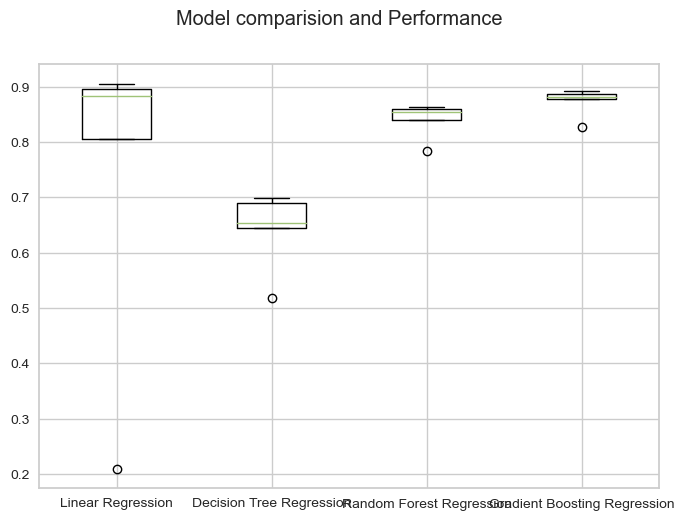

In [211]:
# evaluate each model in turn
results = []
names = []


for name, model in models:
	kfold = model_selection.KFold(n_splits=5)

	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)



# comparision of Algorithms using Boxplots
fig = plt.figure()
fig.suptitle('Model comparision and Performance')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()